In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
salesData = pd.read_csv("sales.csv", decimal=",", skiprows=17, sep=';')
# print(salesData.isnull().sum())
salesData

,orderno,orderdate,empno,name,custno,city,regioncode,prodno,proddesc,catdesc,quantity,linetotal
0,1001,06/01/2017,805,Harrie,15,Veghel,GVGH,408,Fruit Yogurt Mango,Dairy Products,9,146.25
1,1004,14/01/2017,806,Karel,19,Veghel,GVGH,406,Foie Gras,Luxury Products,7,52.50
2,1014,27/01/2017,806,Karel,19,Veghel,GVGH,401,Organic Soymilk Sweetened,Organic Products,22,473.00
3,1014,27/01/2017,806,Karel,19,Veghel,GVGH,405,Sweetbread,Luxury Products,9,80.55
4,1014,27/01/2017,806,Karel,19,Veghel,GVGH,409,Low-Fat Quark,Dairy Products,23,373.75
...,...,...,...,...,...,...,...,...,...,...,...,...
525,1429,08/12/2019,802,Klaas,18,Laarbeek,RHMD,408,Fruit Yogurt Mango,Dairy Products,14,245.00
526,1431,11/12/2019,803,Gerda,18,Laarbeek,RHMD,407,Caviar,Luxury Products,22,284.90
527,1432,15/12/2019,805,Harrie,18,Laarbeek,RHMD,401,Organic Soymilk Sweetened,Organic Products,6,129.00
528,1432,15/12/2019,805,Harrie,18,Laarbeek,RHMD,407,Caviar,Luxury Products,28,362.60


In [65]:
salesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   orderno     530 non-null    int64  
 1   orderdate   530 non-null    object 
 2   empno       530 non-null    int64  
 3   name        530 non-null    object 
 4   custno      530 non-null    int64  
 5   city        530 non-null    object 
 6   regioncode  530 non-null    object 
 7   prodno      530 non-null    int64  
 8   proddesc    530 non-null    object 
 9   catdesc     530 non-null    object 
 10  quantity    530 non-null    int64  
 11  linetotal   530 non-null    float64
dtypes: float64(1), int64(5), object(6)
memory usage: 49.8+ KB


In [66]:
salesData.describe()

,orderno,empno,custno,prodno,quantity,linetotal
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,1219.535849,803.498113,15.288679,406.092453,13.649057,239.306509
std,128.392650,1.713120,2.796444,3.212826,6.211266,157.113719
min,1001.000000,801.000000,11.000000,401.000000,2.000000,17.900000
25%,1108.250000,802.000000,13.000000,403.000000,8.000000,127.875000
50%,1219.500000,803.000000,15.000000,406.000000,13.000000,195.250000
75%,1333.750000,805.000000,18.000000,409.000000,19.000000,332.500000
max,1439.000000,806.000000,20.000000,411.000000,32.000000,918.850000


In [67]:
salesData[['orderno', 'empno', 'custno', 'prodno']] = salesData[['orderno', 'empno', 'custno', 'prodno']].astype(str)

In [68]:
salesData.describe()

,quantity,linetotal
count,530.000000,530.000000
mean,13.649057,239.306509
std,6.211266,157.113719
min,2.000000,17.900000
25%,8.000000,127.875000
50%,13.000000,195.250000
75%,19.000000,332.500000
max,32.000000,918.850000


In [69]:
salesData.describe(include='O')

,orderno,orderdate,empno,name,custno,city,regioncode,prodno,proddesc,catdesc
count,530,530,530,530,530,530,530,530,530,530
unique,439,351,6,6,10,6,3,11,11,3
top,1274,07/10/2018,803,Gerda,14,Eindhoven,REHV,405,Sweetbread,Dairy Products
freq,6,7,105,105,63,159,196,56,56,190


In [70]:
groupedCategory = salesData.groupby('catdesc').sum()
print(groupedCategory)

                  quantity  linetotal
catdesc                              
Dairy Products        2564   49540.95
Luxury Products       2197   21995.40
Organic Products      2473   55296.10


In [71]:
groupedProduct = salesData.groupby('proddesc').sum()
# groupedProduct = salesData.groupby('proddesc').quantity.sum()
print(groupedProduct)

                           quantity  linetotal
proddesc                                      
Caviar                          761    9854.95
Foie Gras                       645    5061.00
Fruit Yogurt Mango              521    8880.50
Fruit Yogurt Strawberry         806   16427.70
Full Yogurt                     738   16124.00
Low-Fat Quark                   499    8108.75
Organic Soy Custard             622   23992.10
Organic Soymilk                 655    7654.50
Organic Soymilk Chocolat        450    7610.50
Organic Soymilk Sweetened       746   16039.00
Sweetbread                      791    7079.45


<AxesSubplot:xlabel='quantity', ylabel='proddesc'>

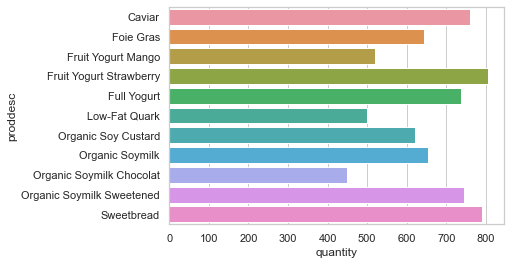

In [78]:
sns.barplot(x=groupedProduct.quantity, y=groupedProduct.index)
# sns.barplot(x=groupedProduct.index, y=groupedProduct.quantity)
# plt.xticks(rotation=70)
# plt.tight_layout()